# Practice 1

## Course "Métodos Estadísticos y Numéricos en Cosmología"

##### Rafael Morales Moreno, Maestría en Ciencias (Física), UNAM

## 1. Exercise: Generate distances

Do a code which calculate the **comoving distance**, the **angular distance** and the **luminosity distance** for the following cosmology:

$$
    \Omega_{m,0}=0.3,
$$

$$
    \Omega_{\Lambda,0}=0.7.
$$

Do a **plot** with the 3 distances, expressed in **Gpc/h** up to a redshift of **z=3**.

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math

In [2]:
# Start specifying Cosmology

Omega_m0 = 0.3
Omega_lambda0 = 0.7
# i.e., Omega_r0 = 0.0 (no radiation contribution)


# one can take approx.
H_0 = 1/2.9979246 # in units of h/Gpc (normally one defines H_0=1/2997.9246 in h/Mpc)

Introducing the expressions of distance in Cosmology:

1. Comoving radial distance

$$
    \chi(z) = \int_0^z \frac{dz'}{H(z')}, 
$$

2. Angular distance
$$
    D_A(z) = \frac{\chi(z)}{1+z}, 
$$

3. Luminosity distance
$$
    D_L(z) = (1+z)\chi(z), 
$$

where we have taken implicitly c=1 and the Hubble as function of z depends on Cosmology as

$$
    H(z) =H_0 \sqrt{\Omega_{m,0}(1+z)^3 +\Omega_{R,0}(1+z)^4 +\Omega_{\Lambda,0}}
$$

In [3]:
#def integrand_chi(z):
#    return 1/H_0 * 1/math.sqrt(Omega_m0*(1+z)**3 + Omega_lambda0)

In [4]:
# # Defining functions using symbolic integration

from sympy import integrate, Symbol
import sympy

z=Symbol('z')          # we need to define z as a symbol bc is an arbitrary value
                       # of redshift and is not the integration variable (z \ineq z')

from sympy.abc import z

# defining the expression H(z) (Friedmann form in terms of abundances Omega) 
H_Friedmann = lambda z:H_0*sympy.sqrt(Omega_m0*(1+z)**3 + Omega_lambda0)

zp=Symbol('zp') # zp stands for z' (z prime)

integrand_chi = 1/(H_Friedmann(zp))
chi = lambda z:integrate(integrand_chi, (zp, 0, z))

In [5]:
print('Then, the Comoving Radial Distance of a redshift z is the integrated value given by')
chi(z)                       # Hypergeometric2F1[1/3, 1/2, 4/3, -a(1 + z)^3/b]

Then, the Comoving Radial Distance of a redshift z is the integrated value given by


1.19440175018246*(z + 1)*gamma(1/3)*hyper((1/3, 1/2), (4/3,), 0.428571428571429*(z + 1)**3*exp_polar(I*pi))/gamma(4/3) - 1.19440175018246*gamma(1/3)*hyper((1/3, 1/2), (4/3,), -0.428571428571429)/gamma(4/3)

### Making neccesary steps to plot $\chi(z)$ and its associated distances

In [6]:
# Creating a table of values of z from 0 to 3

zT = np.linspace(0,3, 300, endpoint= True) # z Table from z=0 (today) to z=3
zT

array([0.        , 0.01003344, 0.02006689, 0.03010033, 0.04013378,
       0.05016722, 0.06020067, 0.07023411, 0.08026756, 0.090301  ,
       0.10033445, 0.11036789, 0.12040134, 0.13043478, 0.14046823,
       0.15050167, 0.16053512, 0.17056856, 0.18060201, 0.19063545,
       0.2006689 , 0.21070234, 0.22073579, 0.23076923, 0.24080268,
       0.25083612, 0.26086957, 0.27090301, 0.28093645, 0.2909699 ,
       0.30100334, 0.31103679, 0.32107023, 0.33110368, 0.34113712,
       0.35117057, 0.36120401, 0.37123746, 0.3812709 , 0.39130435,
       0.40133779, 0.41137124, 0.42140468, 0.43143813, 0.44147157,
       0.45150502, 0.46153846, 0.47157191, 0.48160535, 0.4916388 ,
       0.50167224, 0.51170569, 0.52173913, 0.53177258, 0.54180602,
       0.55183946, 0.56187291, 0.57190635, 0.5819398 , 0.59197324,
       0.60200669, 0.61204013, 0.62207358, 0.63210702, 0.64214047,
       0.65217391, 0.66220736, 0.6722408 , 0.68227425, 0.69230769,
       0.70234114, 0.71237458, 0.72240803, 0.73244147, 0.74247

In [7]:
#array of chi(z) values
y = np.zeros(zT.shape[0]) #  corresponds to the values of chi evaluated in zT[i]

for i in range(zT.shape[0]): # filling from de first to the i-th term (length of zT list)
    y[i] = chi(zT[i])
    
# *** THIS MIGHT TAKE A WHILE DEPENDING ON THE COMPUTARIONAL POWER (~ 1 or 2 mins.)

In [8]:
# Now making array of chi(zT) corresponding to zT 

chi_T = np.concatenate((zT.reshape(-1,1),y.reshape(-1,1)), axis = 1)
chi_T

array([[0.        , 0.        ],
       [0.01003344, 0.03001146],
       [0.02006689, 0.05988625],
       [0.03010033, 0.08962354],
       [0.04013378, 0.11922256],
       [0.05016722, 0.14868256],
       [0.06020067, 0.17800285],
       [0.07023411, 0.20718277],
       [0.08026756, 0.2362217 ],
       [0.090301  , 0.26511908],
       [0.10033445, 0.29387436],
       [0.11036789, 0.32248705],
       [0.12040134, 0.3509567 ],
       [0.13043478, 0.37928289],
       [0.14046823, 0.40746526],
       [0.15050167, 0.43550345],
       [0.16053512, 0.46339717],
       [0.17056856, 0.49114616],
       [0.18060201, 0.51875019],
       [0.19063545, 0.54620907],
       [0.2006689 , 0.57352265],
       [0.21070234, 0.60069082],
       [0.22073579, 0.62771348],
       [0.23076923, 0.65459058],
       [0.24080268, 0.68132211],
       [0.25083612, 0.70790809],
       [0.26086957, 0.73434855],
       [0.27090301, 0.76064357],
       [0.28093645, 0.78679326],
       [0.2909699 , 0.81279777],
       [0.

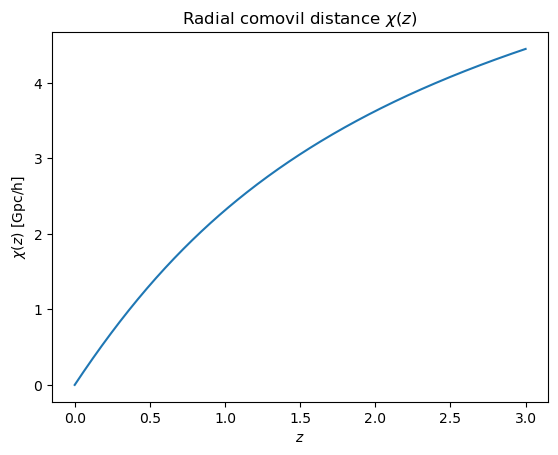

In [9]:
# interpolating array to turn it into a plottable function

from scipy.interpolate import interp1d

chi_interp = interp1d(zT,y) # interpolation of chi_T 

chiOfz = chi_interp(zT) #use interpolated function returned by "interp1d"


# We plot first chi alone to ensure correct functioning

plt.plot(zT,chiOfz, "-")
plt.title(r'Radial comovil distance $\chi(z)$ ')
plt.xlabel(r"$z$")
plt.ylabel(r"$\chi(z)$ [Gpc/h]")

#plt.xlim(0, 3)

plt.show()

In [10]:
# In analogy, defining now the angular distance as a numpy array in terms of chi

dist_ang = chiOfz/(1+zT)
dist_ang

array([0.        , 0.02971333, 0.05870816, 0.08700467, 0.11462233,
       0.14157989, 0.16789543, 0.1935864 , 0.21866963, 0.24316136,
       0.2670773 , 0.29043261, 0.31324195, 0.33551948, 0.35727892,
       0.37853352, 0.39929612, 0.41957914, 0.43939463, 0.45875425,
       0.47766929, 0.4961507 , 0.51420912, 0.53185485, 0.54909788,
       0.56594791, 0.58241436, 0.59850639, 0.61423286, 0.62960242,
       0.64462343, 0.65930406, 0.67365222, 0.68767563, 0.70138176,
       0.71477791, 0.72787116, 0.74066843, 0.75317641, 0.76540166,
       0.77735054, 0.78902925, 0.80044382, 0.81160014, 0.82250394,
       0.83316081, 0.84357618, 0.85375537, 0.86370354, 0.87342575,
       0.8829269 , 0.89221181, 0.90128513, 0.91015145, 0.91881521,
       0.92728077, 0.93555235, 0.9436341 , 0.95153006, 0.95924418,
       0.9667803 , 0.97414218, 0.9813335 , 0.98835784, 0.99521871,
       1.00191951, 1.00846361, 1.01485425, 1.02109463, 1.02718786,
       1.033137  , 1.03894501, 1.04461481, 1.05014923, 1.05555

In [11]:
# As in the previous case, defining luminosity distance (np.array) in terms of chi

dist_lum = chiOfz *(1+zT)
dist_lum

array([ 0.        ,  0.03031258,  0.06108798,  0.09232124,  0.12400741,
        0.15614155,  0.18871874,  0.22173407,  0.25518264,  0.2890596 ,
        0.32336008,  0.35807927,  0.39321236,  0.42875458,  0.46470118,
        0.50104744,  0.53778869,  0.57492025,  0.61243751,  0.65033588,
        0.68861081,  0.72725778,  0.7662723 ,  0.80564995,  0.8453863 ,
        0.885477  ,  0.92591773,  0.9667042 ,  1.00783218,  1.04929745,
        1.09109588,  1.13322333,  1.17567576,  1.21844912,  1.26153945,
        1.30494279,  1.34865527,  1.39267304,  1.43699229,  1.48160927,
        1.52652027,  1.57172162,  1.61720971,  1.66298095,  1.70903183,
        1.75535885,  1.80195858,  1.84882763,  1.89596265,  1.94336032,
        1.9910174 ,  2.03893067,  2.08709696,  2.13551313,  2.18417611,
        2.23308285,  2.28223036,  2.33161567,  2.38123588,  2.43108812,
        2.48116954,  2.53147737,  2.58200885,  2.63276127,  2.68373196,
        2.7349183 ,  2.78631768,  2.83792756,  2.88974543,  2.94

## Resulting Plot

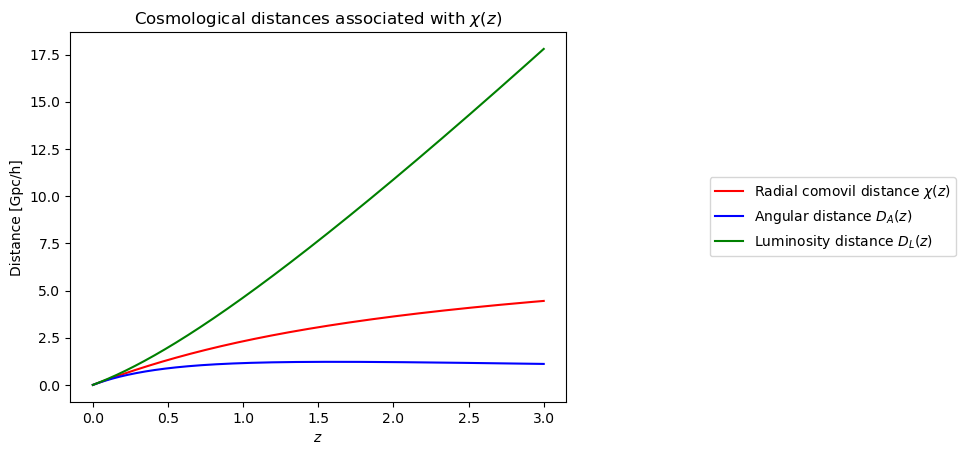

In [12]:
# Plotting togheter the three curves

plt.plot(zT,chiOfz, 'r-', label=r'Radial comovil distance $\chi(z)$')
plt.plot(zT,dist_ang, 'b-', label=r'Angular distance $D_A(z)$')
plt.plot(zT,dist_lum, 'g-', label=r'Luminosity distance $D_L(z)$')


plt.title(r'Cosmological distances associated with $\chi(z)$')
plt.xlabel(r"$z$")
plt.ylabel(r"Distance [Gpc/h]")


plt.legend(loc='right',bbox_to_anchor=(1.8, 0.5))

plt.show()

## Ex. 2: Density evolution

We consider a cosmological model in which:

$$
    \Omega_{m,0} = 0.2999, \\
\Omega_{\Lambda,0} = 0.7, \\
    \Omega_{R,0} = 0.0001.
$$

Make a **plot** with the **evolution of $\rho_m$** with the time for redshift from $z = 0$ to $z = 10000$. In order to do it, we propose to follow this path:

   -1. Determine the **redshift/scale factor of equivalence** $z_{eq}^{\Lambda,m}$/$a_{eq}^{\Lambda,m}$ between $\Omega_\Lambda$ and $\Omega_m$
    
   -2. Determine the **redshift/scale factor of equivalence** $z_{eq}^{R,m}$/$a_{eq}^{R,m}$ between $\Omega_R$ and $\Omega_m$
   
   -3. Determine the **evolution of $a(t)$** for the era of domination of the 3 components
   
   -4. Determine the **evolution of $\rho_m(t)$** for the era of domination of the 3 components
   
   -5. **Convert** the $a_{eq}$ in the corresponding **lookback-time**
   
   -6. Plot the evolution of $\rho_m(t)$ with the **time in log-log** scale for the period corresponding to $z=0$ up to $z=10000$ considering the different eras.

In [13]:
# Specifying Cosmology parameters

Omega2_m0 = 0.2999
Omega_lambda0 = 0.7
Omega_R0 = 0.0001

We know that the energy densities evolve in $a(t)$ (i.e., consequently in $z$) as

$$
    \rho_m(a) = \frac{\rho_{m,0}}{a^3},
$$

$$
    \rho_R(a) = \frac{\rho_{R,0}}{a^4},
$$

$$
    \rho_\Lambda(a) = \mbox{const.}
$$

Hence, the equality between the $\Lambda$ and $m$ components it's given when $\rho_\Lambda(a) = \rho_m(a)$, i.e.,

$$
    a_{eq}^{\Lambda,m} = \sqrt[3]{\frac{\Omega_{m,0}}{\Omega_{\Lambda,0}}}
$$

(since $\Omega_X = \frac{\rho_{X,0}}{\rho^{cr}_{X,0}}$ for any $X$ component).

Analogously, the equality between the $m$ and $R$ components it's given when $\rho_m(a) = \rho_R(a)$, i.e.,

$$
    a_{eq}^{m,R} = \frac{\Omega_{R,0}}{\Omega_{m,0}}.
$$

In [14]:
# 1. Computing the value of a_eq between Lambda and matter 

a_eq_Lm = (Omega2_m0/Omega_lambda0)**(1./3)

print('The value of the scale factor at the momento of equality between Lambda and m densities is a_eqLm =', a_eq_Lm)

The value of the scale factor at the momento of equality between Lambda and m densities is a_eqLm = 0.7538636598815334


Consequently, the corresponding value of redshift is given by the relation with $a(t)$

$$
    a(t) = \frac{1}{1+z},
$$

which is computed below:

In [15]:
z_eq_Lm = 1/a_eq_Lm -1
print('The corresponding redshift is then z_eqLm =', z_eq_Lm)

The corresponding redshift is then z_eqLm = 0.32649980787924693


In [16]:
# 2. Accordingly, the scale factor of equivalence between matter and radiation is computed as

a_eq_mR = Omega_R0/Omega2_m0
print('The equality scale factor between matter and radiation is a_eq_mR =', a_eq_mR)

The equality scale factor between matter and radiation is a_eq_mR = 0.0003334444814938313


In [17]:
z_eq_mR = 1/a_eq_mR -1
print('The corresponding redshift is then z_eq_mR =', z_eq_mR)

The corresponding redshift is then z_eq_mR = 2997.9999999999995


### 3.
It is known that the evolution of the scale factor $a(t)$ is, taking as an ansatz for matter and radiation domination a power law $a \propto t^n$,

$$
    a(t) = a_0 t^{\frac{2}{3(1+\omega)}},
$$

since $\rho \propto a^{-3(1+\omega)}$, and from Friedmann eq. $\left( \frac{\dot{a}}{a} \right)^2 = \frac{8 \pi G}{3}\rho \propto t^{-2}$, i.e., $\rho \propto t^{-3(1+\omega)n}$, which leads to $n = \frac{2}{3(1+\omega)}$.

That means, having in mind the value of the state parameter $\omega$ for the case of matter and radiation domain, we have, respectively,


$$
    \mbox{Matter (dust): } p=0, \ i.e., \ \omega_m = 0, \Rightarrow \boxed{a(t) \propto t^{2/3}}, 
$$

$$
    \mbox{Radiation: } p=\frac{1}{3}\rho, \ i.e., \ \omega_R = \frac{1}{3}, \Rightarrow \boxed{a(t) \propto t^{1/2}}.
$$


On the other hand, for cosmological constant domination, when $\rho_\Lambda = const.$,

$$
    \left( \frac{\dot{a}}{a} \right)^2 = H \mbox{ (const.)} \ \Rightarrow a(t) \propto exp^{H \ \ t}.
$$

From Friedmann eq. we know $H^2\equiv (\dot{a}/a)^2 = 8\pi G/3 \, \rho_\Lambda \ \ (k=0)$.

Thus,

$$
    \boxed{a(t) \propto e^{\sqrt{\frac{8\pi G}{3}\rho_\Lambda}\ t}}.
$$

In addition, one can express the coefficient of $t$ in the exponent in  different form since the next analysis:

$$\sqrt{\frac{8\pi G}{3}\rho_\Lambda},$$

with $\rho_\Lambda = \rho_\Lambda^0$ (const.), so $\rho_\Lambda^0 = \Omega_\Lambda \rho_{cr}^0$,

but, by definition, $ \rho_{cr}^0 \equiv \frac{3H_0^2}{8\pi G}$. Consequently,

$$
    \sqrt{\frac{8\pi G}{3}\rho_\Lambda} = \sqrt{\frac{8\pi G}{3}\left( \frac{\Omega_\Lambda 3H_0^2}{8\pi G} \right)} = H_0 \sqrt{\Omega_\Lambda} \simeq 0.83666 H_0.
$$

In conclusion, $$  \mbox{Cosmolog. Const. }(\Lambda):\ p=-\rho, \ i.e., \ \omega_\Lambda = -1, \Rightarrow\boxed{a(t) \propto \, e^{\sqrt{\Omega_\Lambda}H_0 \ t}}. $$

## 4.
### Evolution of 𝜌𝑚(t) for the era of dom. of the 3 comps.

From the previous result, it's possible to determine the expression for $\rho_m(t)$ for the domain of each component, substituting the resulting expression of $a(t)$ as follows.

We know from item 2) that the evolution of $\rho_m(a)$ (normalized with  the critical density today $\rho_{cr}^0$) is

$$
    \rho_m(a) = \frac{\rho_{m,0}}{a^3} = \frac{\Omega_m \rho_{cr}^0}{a^3}, \Rightarrow \boxed{ \rho_m(a)/\rho_{cr}^0 =  \frac{\Omega_m}{a^3} }
$$

then 

in matter domain: $\rho_m(t)/\rho_{cr}^0 = \frac{\Omega_m}{a^3(t)} = \frac{\Omega_m}{(t^{2/3})^3} = \boxed{\frac{\Omega_m}{t^2}}$,

in radiation domain: $\rho_m(t) / \rho_{cr}^0= \frac{\Omega_m}{a^3(t)} = \frac{\Omega_m}{(t^{1/2})^3} = \boxed{\frac{\Omega_m}{t^{3/2}}}$,

in CC domain: $\rho_m(t)/ \rho_{cr}^0= \frac{\Omega_m}{a^3(t)} = \frac{\Omega_m}{\left(e^{\sqrt{\Omega_\Lambda}H_0 \, t}\right)^3} = \boxed{\Omega_m e^{-3\sqrt{\Omega_\Lambda}H_0 \, t}}$.

### 5.
Converting the value of the scale factor of equality $a(t)_{eq}$ (of every case) into lookback-time, i.e., the time it took a light signal to travel from the moment it was emitted in the past until now (the variable of time commonly used in Physics $t$), is equivalent to compute the integral from $z=0$ (now) to the redshift $z_{eq}$, through the equation following

$$
    t_L = t_H \int_0^z \frac{dz'}{(1+z') E(z')},
$$

where $t_H \equiv \frac{1}{H_0}$ is the *Hubble time* and $E(z) = H(z)/H_0 = \sqrt{\Omega_{m,0}(1+z)^3 +\Omega_{R,0}(1+z)^4 +\Omega_{\Lambda,0}}$, so

$$
    t_L^{eq} = \frac{1}{H_0}  \int_0^{z_{eq}} \frac{dz'}{(1+z') \sqrt{\Omega_{m,0}(1+z')^3 +\Omega_{R,0}(1+z')^4 + \Omega_{\Lambda,0}} }.
$$


In [18]:
# Then defining the integrand (1+z')E(z') as a new function and then the integral t_lookback(z)

def integrand_lookbackt(z):
    return 1/(H_0*(1+z)*math.sqrt(Omega2_m0*(1+z)**3 + Omega_R0*(1+z)**4 + Omega_lambda0))

from scipy.integrate import quad
# call quad to integrate function from z=0 to z_eq between Lambda & matter

t_lookback_eqLm, err = quad(integrand_lookbackt, 0, z_eq_Lm)

# Now in a similar way, we compute the equivalent lookback time for equiv. between matter & radiation
t_lookback_eqmR, err = quad(integrand_lookbackt, 0, z_eq_mR)

#t_lookback_eqmR = integrate(lambda zz: integrand_lookbackt(zz), (zz, 0, z_eq_mR))

print('The corresponding lookbacktime of the equality moments (scale factor a(t) & redshift z) in units of Gpc/h are')
print('t_eq_Lm =', t_lookback_eqLm, ' and t_eq_mR =', t_lookback_eqmR)

The corresponding lookbacktime of the equality moments (scale factor a(t) & redshift z) in units of Gpc/h are
t_eq_Lm = 0.7851419982614096  and t_eq_mR = 2.8892264857588796


In [22]:
# That means, in seconds over h those quantities are equivalent to
t_eq_Lm = t_lookback_eqLm*1.025e+17
t_eq_mR = t_lookback_eqmR*1.025e+17

print('t_eq_Lm =', t_eq_Lm, ', t_eq_mR =', t_eq_mR, '(in sec/h)')

t_eq_Lm = 8.047705482179448e+16 , t_eq_mR = 2.961457147902852e+17 (in sec/h)


### 6.
Plot the evolution of $\rho_m(t)$ with t in log-log scale for the period z=0 - 10000, considering the different eras.

$$
 \rho_m(a)/\rho_{cr}^0 =  \frac{\Omega_m}{a^3} \ \ \Rightarrow \qquad  \rho_m(t)/\rho_{cr}^0 = \left\{
    \begin{array}\\
        \frac{\Omega_m}{t^2} & \mbox{(mat)}\\
        \frac{\Omega_m}{t^{3/2}} & \mbox{(rad)}\\
        \Omega_m e^{-3\sqrt{\Omega_\Lambda}H_0 \, t} & \mbox{(CC)}
    \end{array}
\right.
$$


In [20]:
# First, converting the values of z (0 & 10,000) into time variable by means of the same integral of lookback time

t_0, err = quad(integrand_lookbackt, 0, 0) # this result is quite obvious that is 0 itself, but is calculated for completeness

t_10000, err = quad(integrand_lookbackt, 0, 10000)

print('t(z=0) =',t_0*1.025e+17, 's/h,', ' t(z=10 000) =', t_10000*1.025e+17,'s/h')

t(z=0) = 0.0 s/h,  t(z=10 000) = 2.961469086253558e+17 s/h


In [46]:
# NOTICE the constant H_0 also has to be chnged, i.e., converted from h/Gpc to h/seconds
H_0_s = H_0/1.025e+17              # in seconds

# now we are going to calculate the initial constant of rho_m for radiation and CC
                                        #in order to get them in the equality time


a_0 = (t_eq_mR/2)**(-2)/(t_eq_mR)**(-3/2)   # 9.7e-9
a_0_CC = (t_eq_mR)**(-2)/(math.exp(-3*math.sqrt(Omega_lambda0)*H_0_s*(t_eq_mR)))  # 1.98e-35

print(a_0,a_0_CC)

7.3503372326502014e-09 1.2809614137363295e-34


In [47]:
# Defining each functional form of rho_m

# Matter
def dens_matt(t):
    return Omega2_m0/t**2

# Rad
def dens_rad(t):
    return 9.7e-9*Omega2_m0 / t**(3/2)
    
# CC
def dens_CC(t):
    return a_0_CC*Omega2_m0*np.exp(-3*np.sqrt(Omega_lambda0)*H_0_s*t)

In [48]:
convertion_Gpc_s = 1.025e+17
t_H = 1/(H_0/convertion_Gpc_s)
t_H

3.072872715e+17

In [49]:
# That means that if we want to show this evolution in the common time variable t (not lookback-time)
# we just have to make the difference with the age of the universe t_H

time_hoy = t_H
timeEq_Lm = t_H - t_lookback_eqLm*convertion_Gpc_s
timeEq_mR = t_H - t_lookback_eqmR*convertion_Gpc_s
time_z10000 = t_H - t_10000*convertion_Gpc_s

In [50]:
print(timeEq_Lm)
print(timeEq_mR)
print(time_z10000)

2.268102166782055e+17
1.1141556709714816e+16
1.1140362874644224e+16


In [51]:
time_tot = np.linspace(9.00e+15,3.072872715e+17,10000,endpoint= True)

y_dens_rad = dens_rad(time_tot)
y_dens_matt = dens_matt(time_tot)
y_dens_CCosm = dens_CC(time_tot)

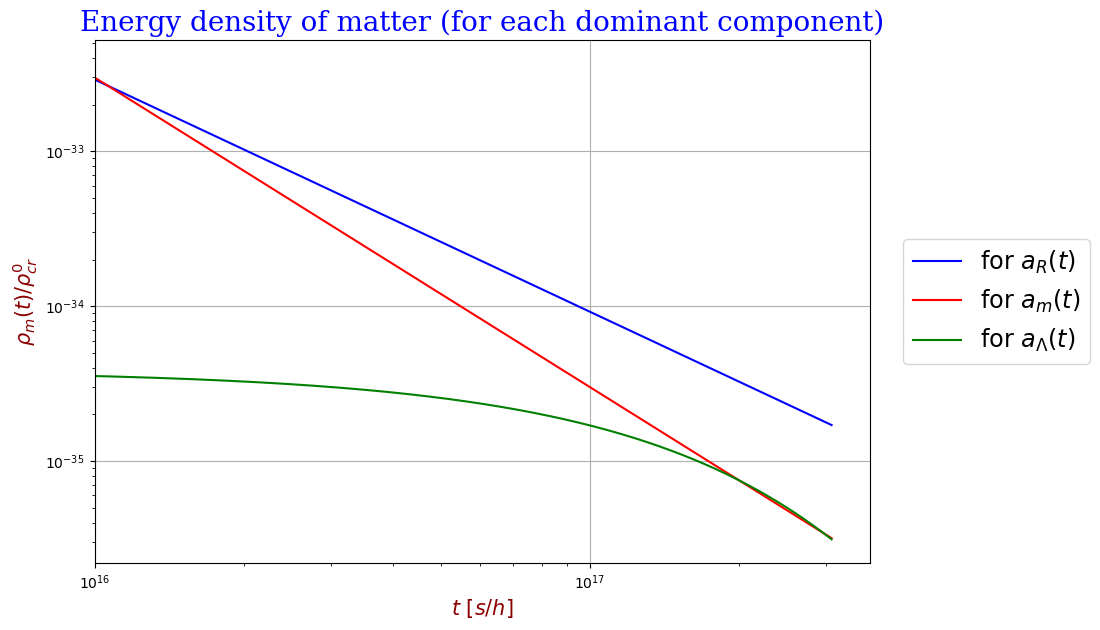

In [52]:
plt.loglog(time_tot, y_dens_rad, 'b-', label=r'for $a_R(t)$')
plt.loglog(time_tot, y_dens_matt, 'r-', label=r'for $a_m(t)$')
plt.loglog(time_tot, y_dens_CCosm, 'g-', label=r'for $a_\Lambda(t)$')

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.title(r'Energy density of matter (for each dominant component)', fontdict = font1)
plt.xlabel(r"$t \ [s/h]$", fontdict = font2)
plt.ylabel(r"$\rho_m(t) / \rho_{cr}^0$ ", fontdict = font2)
plt.grid()
plt.xlim(1e+16)

plt.legend(loc='right',bbox_to_anchor=(1.3, 0.5),fontsize = 'xx-large')
plt.rcParams["figure.figsize"] = (10,6.8)

plt.show()

In [53]:
# from time_z10000 to time_eq_Matter-Rad
time1 = np.linspace(5.1140362874644224e+15,1.1141556709714816e+16,10000,endpoint= True)

# from time_eq_Matter-Rad to time_eq_Lambda-Matter
time2 = np.linspace(1.1141556709714816e+16,2.268102166782055e+17,10000,endpoint= True)

# from time_eq_Lambda-Matter to t_H (today)
time3 = np.linspace(2.268102166782055e+17,3.073872715e+17,10000,endpoint= True)

In [54]:
# defining them again as function of this time intervals

y_rad = dens_rad(time1)
y_matt = dens_matt(time2)
y_CCosm = dens_CC(time3)

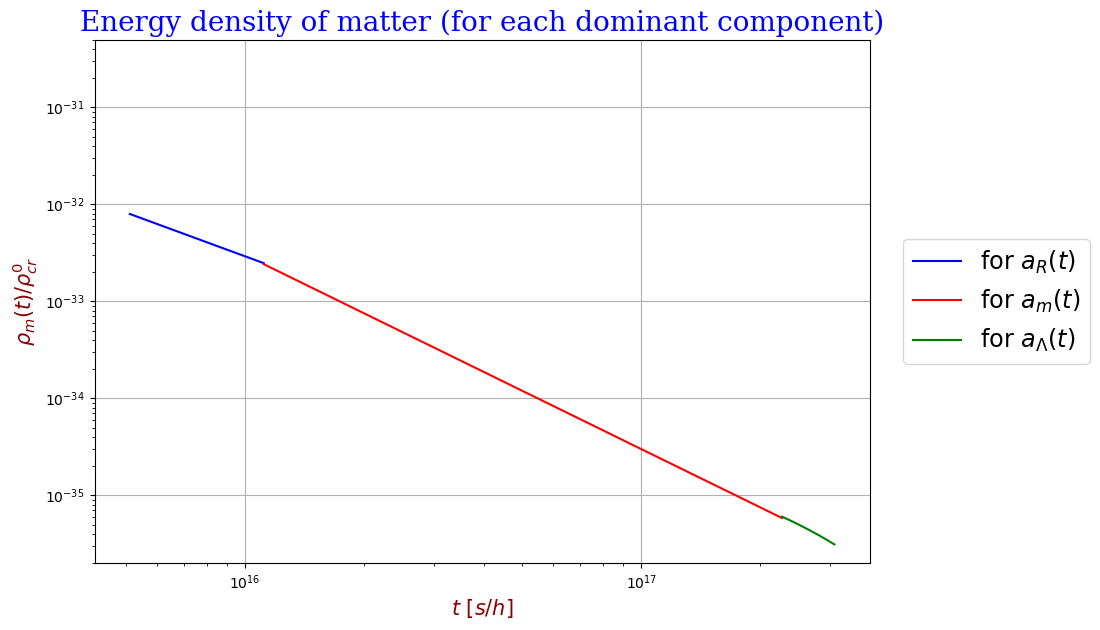

In [55]:
# Plotting togheter the three curves

plt.loglog(time1, y_rad, 'b-', label=r'for $a_R(t)$')
plt.loglog(time2, y_matt, 'r-', label=r'for $a_m(t)$')
plt.loglog(time3, y_CCosm, 'g-', label=r'for $a_\Lambda(t)$')

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.title(r'Energy density of matter (for each dominant component)', fontdict = font1)
plt.xlabel(r"$t \ [s/h]$", fontdict = font2)
plt.ylabel(r"$\rho_m(t) / \rho_{cr}^0$ ", fontdict = font2)
plt.grid()
plt.ylim(2e-36,5e-31)

plt.legend(loc='right',bbox_to_anchor=(1.3, 0.5),fontsize = 'xx-large')
plt.rcParams["figure.figsize"] = (10,6.8)

plt.show()